Chroma feature extraction

In [16]:
#import ChromaFeatures class
from chromaFeatures import ChromaFeatures

In [2]:
audio_path = "/Users/Correya/Documents/x.mp3" #replace with the path to your audio file

# Initiate the ChromaFeatures class 
chroma = ChromaFeatures(audio_file=audio_path, mono=True, sample_rate=44100) 
# if not specified the class is initiated with default params
chroma = ChromaFeatures(audio_path)

====== Audio vector of /Users/Correya/Documents/x.mp3 loaded with shape (15435000,) and sample rate 44100 ===== 
====== Audio vector of /Users/Correya/Documents/x.mp3 loaded with shape (15435000,) and sample rate 44100 ===== 


In [9]:
#Now you can access various chroma variant features as a method of chroma object
c_stft = chroma.chroma_stft()
c_cqt = chroma.chroma_cqt()
# you can pass extra parameters such as hop_size and number of bins etc while computing specific features
c_hpcp = chroma.chroma_hpcp(hopSize=1024, numBins=24)

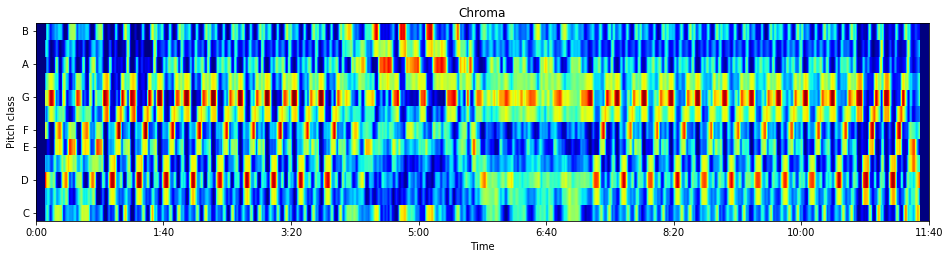

In [6]:
# you can also plot the chroma vector by passing a boolean argument to the computation function
c_cens = chroma.chroma_cens(display=True)

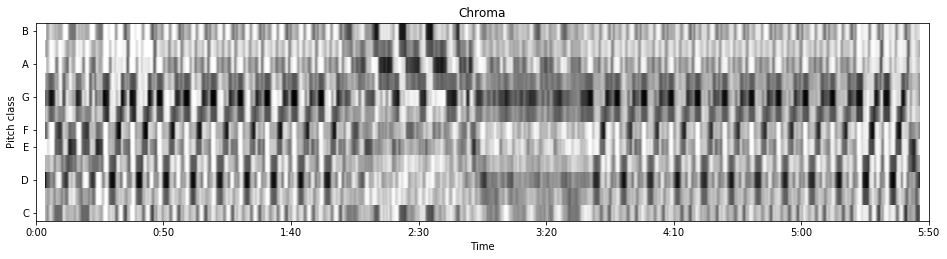

In [7]:
"""
You can even plot the chroma vector anytime after the feature computation using 
the display methods available in the chroma object with the available color maps 
in matplotlib
"""
chroma.displayChroma(c_cens, cmap="gray_r")

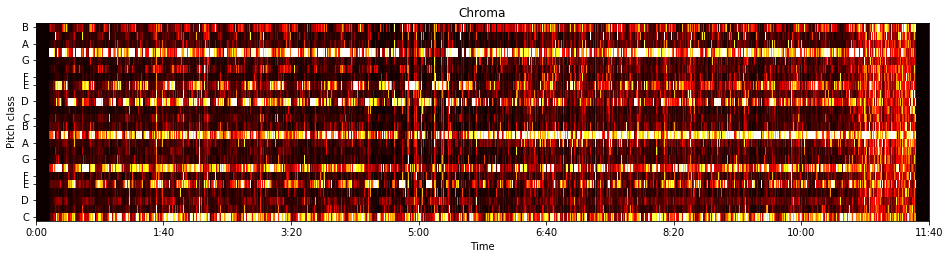

In [15]:
# plotting chroma_hpcp vector with 24 bins
chroma.displayChroma(c_hpcp, cmap='hot')

Computing various cover song audio similarities



In [17]:
#import similarity measures objects
import similarityMeasures as s_measures

In [20]:
audio1 = "/Users/Correya/Documents/x.mp3"
audio2 = "/Users/Correya/Documents/x.mp3"

chroma1 = ChromaFeatures(audio1)
chroma2 = ChromaFeatures(audio2)

====== Audio vector of /Users/Correya/Documents/x.mp3 loaded with shape (15435000,) and sample rate 44100 ===== 
====== Audio vector of /Users/Correya/Documents/x.mp3 loaded with shape (15435000,) and sample rate 44100 ===== 


In [21]:
# computing optimal transposition between two chroma vectors
s_measures.optimalTranspositionIndex(chroma1.chroma_hpcp(), chroma2.chroma_hpcp())
# The output will be 0 since we compare the same chroma vector 

0

In [22]:
recurrentplots = s_measures.RecurrentPlots()

In [24]:
similarity_matrix = recurrentplots.crossRecurrentPlot(chroma1.chroma_hpcp(), chroma.chroma_hpcp())
similarity_matrix


Optimal Transposition Index (OTI) : 0


array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

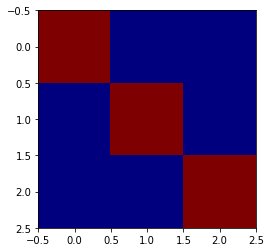

In [29]:
# Plot the cross recurrent plot (similarity matrix) of two chroma feature vectors.
# since we compare the same song againt itself we see a clear diagonal
recurrentplots.plotCRP(similarity_matrix, cmap='jet')

In [32]:
recurrentplots.qmaxMeasure(similarity_matrix)


crp with shape : (3, 3)


1.7320508075688772